In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

## IMDB 

In [3]:
path = Path("/home/ricky/Desktop/repos/fastai_course/data")
path = untar_data(URLs.IMDB_SAMPLE, dest=path)
path

PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb_sample')

In [4]:
path.ls()

[PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb_sample/texts.csv'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb_sample/data_save.pkl')]

In [5]:
df = pd.read_csv(path/"texts.csv")
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [6]:
df.is_valid.value_counts()

False    800
True     200
Name: is_valid, dtype: int64

In [7]:
df["text"][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [8]:
data_lm = TextDataBunch.from_csv(path, "texts.csv")

In [9]:
data_lm.save()

In [10]:
data = load_data(path)

In [11]:
data = TextClasDataBunch.from_csv(path, "texts.csv")
data.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - xxunk xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [12]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [13]:
data.train_ds[0][0]

Text xxbos xxmaj this game is the bomb and this is the xxunk game of the year and should be on greatest hits . xxmaj when i got xxmaj agent xxmaj under xxmaj fire , i thought that was a good game but then xxmaj xxunk came around and that was better , but now there is a new type of xxmaj james xxmaj bond game . xxmaj this time it a 3rd person shooter and there is more than 12 xxunk , the graphics of the game are out of this house . xxmaj it even has all of the great actors and actresses in this game like xxmaj pierce xxmaj xxunk as once again xxmaj james xxmaj bond , xxmaj william xxmaj xxunk as the villain xxmaj xxunk xxmaj xxunk , and xxmaj xxunk xxmaj xxunk as m ( forgive me all if i spell it wrong ) . xxmaj this game would be own as the greatest xxmaj james xxmaj bond game around . 
 
  i give this a 10 / 10

In [14]:
data.train_ds[0][0].data[:10]

array([   2,    5,   21,  510,   16,    9, 2182,   12,   21,   16])

In [15]:
data = (TextList.from_csv(path, "texts.csv", cols="text")
       .split_from_df(col=2)
       .label_from_df(cols=0)
       .databunch())

In [16]:
bs = 48

In [17]:
path = Path("/home/ricky/Desktop/repos/fastai_course/data")
path = untar_data(URLs.IMDB, dest=path)
path.ls()

[PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/models'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/tmp_lm'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/train'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/unsup'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/README'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/tmp_clas'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/imdb.vocab'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/data_lm.pkl'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/test')]

In [18]:
(path/"train").ls()

[PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/train/pos'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/train/neg'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/ricky/Desktop/repos/fastai_course/data/imdb/train/labeledBow.feat')]

In [19]:
data_lm = (TextList.from_folder(path)
          .filter_by_folder(include=["train", "test", "unsup"])
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs))
data_lm.save("data_lm.pkl")

In [20]:
data_lm = load_data(path, "data_lm.pkl", bs=bs)

In [21]:
data_lm.show_batch()

idx,text
0,"is a great picture to show to kids because it emphasizes friendship , love , and again , caring . xxmaj not to mention the xxmaj care xxmaj bears are just too adorable ! xxbos xxmaj you do not get more dark or tragic than "" xxmaj othello "" and this movie captures the play fairly well , with outstanding performances by xxmaj lawrence xxmaj fishburne and xxmaj irene xxmaj"
1,"to compare the very ordinary movie - length version of "" xxmaj pride and xxmaj prejudice "" in 2005 with the brilliant 1995 six - part xxup tv mini - series . xxmaj it 's not that a novel should be filmed page by page , and some novels ( often not very good ones ) adapt wonderfully to film ( "" xxmaj atonement "" is a recent example )"
2,"watching xxup t.v. xxmaj she 'd rather be in the floor playing with a toy or with our small toy poodle than watch xxup t.v. yet , the doodle bops have totally captured her attention . i do n't know if she will continue to like them in the future but for now she 's attached . xxbos xxmaj an xxmaj american in xxmaj paris is a wonderful musical about"
3,"xxmaj even though the majority tone in the film is dark , there are plenty of funny scenes to be had . xxmaj the writing , directing , and acting are brilliant . xxmaj if you like road movies , murder , humor , and narration , watch this film . xxmaj everyone delivers , and you will want more when the credits roll . xxmaj one of my all"
4,"character in the movie . \n \n xxmaj if you think about it xxmaj disney movies can really lost their charm . xxmaj with xxmaj xxunk xxmaj wood and others the movie has such a feel to it , you simply ca n't help but smile \n \n xxmaj they say the moral of this story is that dreams come true . xxmaj of course in the real"


In [22]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


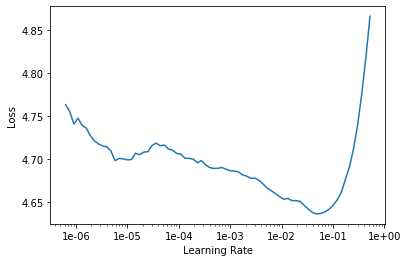

In [24]:
learn.recorder.plot(skip_end=15)

In [25]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.167059,4.027408,0.295226,51:47


In [26]:
learn.save("fit_head")

In [27]:
learn.load("fit_head");

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8, 0.7))